Outline of the project:

1. Download the dataset
2. Explore & analyze the dataset
3. Prepare the dataset for ML training
4. Peform feature engineering
5. Select input columns
6. Train different models


In [1]:
# import the necessary libraries
import opendatasets as od
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib
from sklearn.cluster import KMeans

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

# 1. Download the dataset

In [2]:
# Download the data from kaggle
url = 'https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python'
# I commented the below command to not to download the data after the first run
# od.download(url)

In [3]:
# Assign the dataset directory to a variable
data_dir='data'

## Load the dataset

In [4]:
#Select the required columns and load the dataset
selected_cols = ['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

input_df=pd.read_csv(data_dir+'/Mall_Customers.csv',
                     usecols=selected_cols)

# 2. Explore & analyze the dataset

In [5]:
# Display the features info
input_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


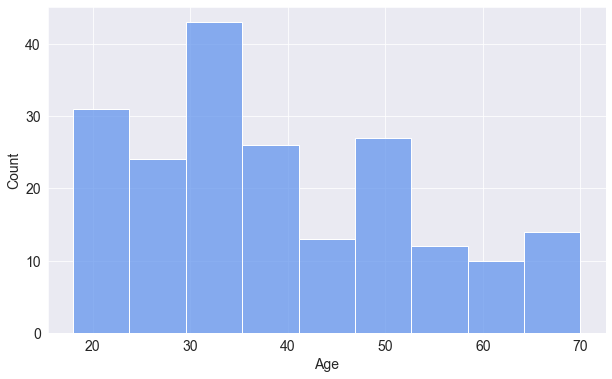

In [6]:
# Plot the histogram of Age
sns.histplot(data=input_df,
            x='Age',
            color='cornflowerblue');

> Early 30's spend more then followed by early 20's in the age category

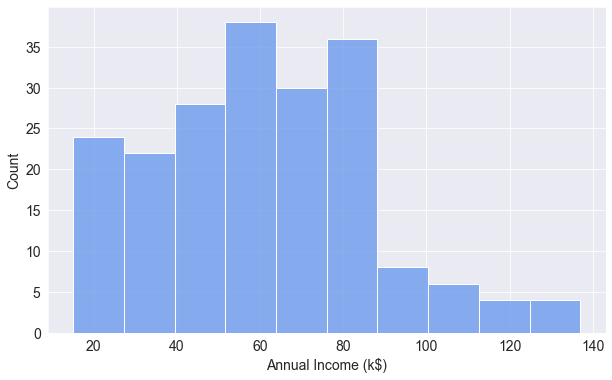

In [7]:
# Plot the histogram of Annual Income (k$)
sns.histplot(data=input_df,
            x='Annual Income (k$)',
            color='cornflowerblue');

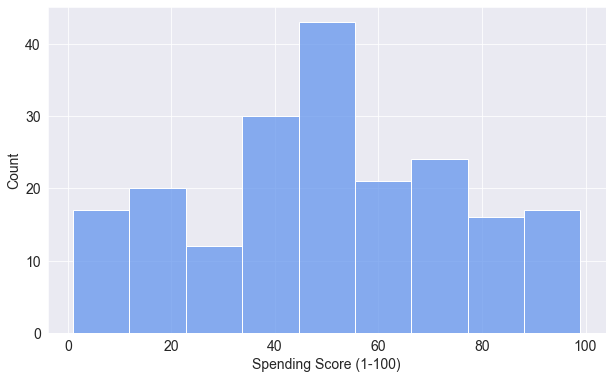

In [8]:
# Plot the histogram of Spending Score (1-100)
sns.histplot(data=input_df,
            x='Spending Score (1-100)',
            color='cornflowerblue');

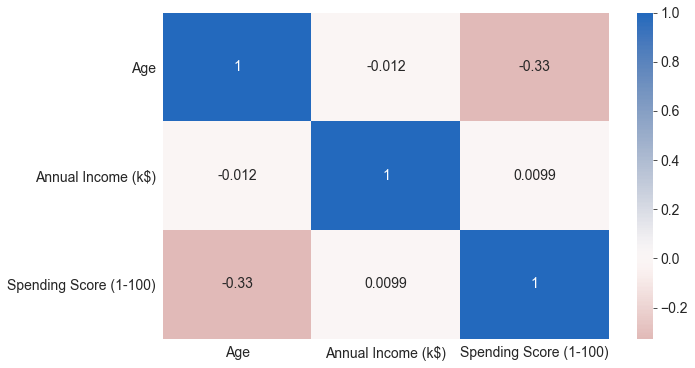

In [9]:
# Plot the heatmap to see the correlation among the features
sns.heatmap(input_df.corr(), cmap='vlag_r', center=0, annot=True);

# 3. Prepare the dataset for ML Training

In [10]:
# Map the gender value
input_df['Gender'] = input_df['Gender'].map({'Male': 0,'Female': 1})

# 4. Feature Engineering

### Group the age by decade

In [11]:
# Group the age by decade 
input_df['AgeByDecade'] = pd.cut(x=input_df['Age'], 
                                 bins=[15,29,39,49,59,69,79], 
                                 labels=[20, 30, 40, 50, 60, 70])
input_df['AgeByDecade'].unique()

[20, 30, 60, 50, 40, 70]
Categories (6, int64): [20 < 30 < 40 < 50 < 60 < 70]

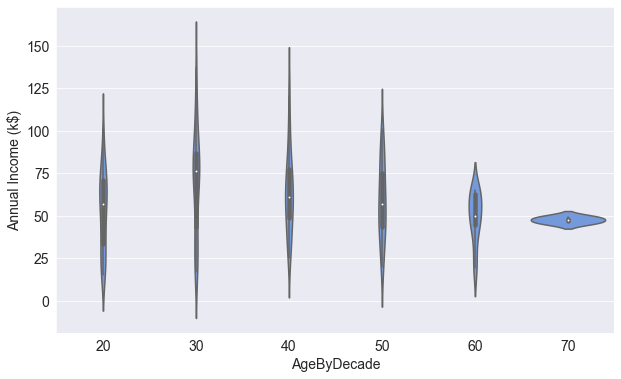

In [12]:
# Plot to show the relationship between AgeByDecade and Annual Income (k$)
sns.violinplot(data=input_df,
               x='AgeByDecade',
               y='Annual Income (k$)',
               color='cornflowerblue');

> Median annual income is higher for the age 30's

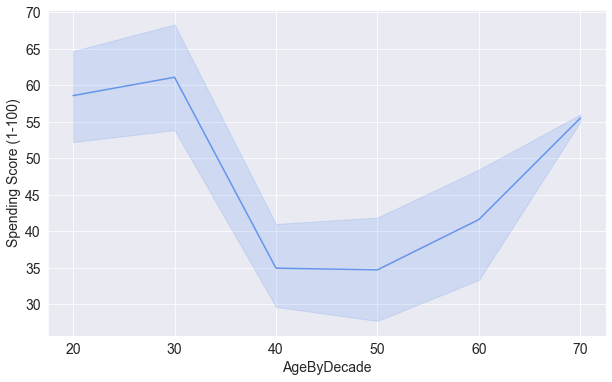

In [13]:
# Plot to show the relationship between AgeByDecade and Spending Score (1-100)
sns.lineplot(data=input_df,
             x='AgeByDecade',
             y='Spending Score (1-100)',
             color='cornflowerblue');

> People are in 30's spend more than the other age group

### Income group

In [14]:
# Map the Annual Income (k$) to a discrete bin
input_df['IncomeGroup'] = pd.cut(x=input_df['Annual Income (k$)'],
                                 bins=[0,50,100,150],
                                 labels=[0,1,2] #['Low', 'Medium', 'High']
                                )
input_df['IncomeGroup'].unique()

[0, 1, 2]
Categories (3, int64): [0 < 1 < 2]

''

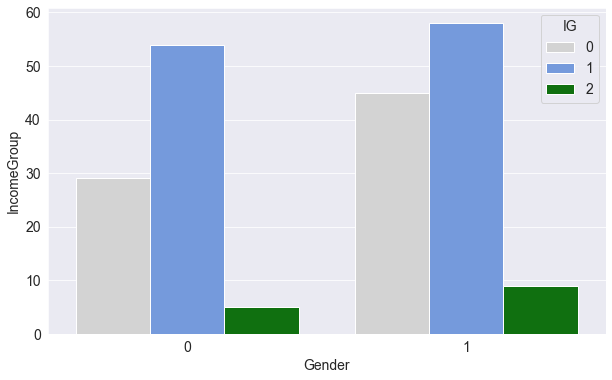

In [15]:
# Plot the relationship between the Gender and the IncomeGroup
gen_ig_df = input_df.groupby('Gender')['IncomeGroup'].value_counts()
gen_ig_df.index.names = ['Gender', 'IG']
gen_ig_df = gen_ig_df.reset_index()

sns.barplot(data=gen_ig_df,
            x='Gender',
            y='IncomeGroup',
            hue='IG',
            palette=['lightgray', 'cornflowerblue', 'green']
           )
# plt.legend(['Low', 'Medium', 'High'])
;

# 5. Select input columns

In [16]:
# Select input columns for modeling
input_cols = ['AgeByDecade', 'Annual Income (k$)', 'Spending Score (1-100)'] # 'Gender', 'IncomeGroup'

X = input_df[input_cols]
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   AgeByDecade             200 non-null    category
 1   Annual Income (k$)      200 non-null    int64   
 2   Spending Score (1-100)  200 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 3.7 KB


# 6. Train Model

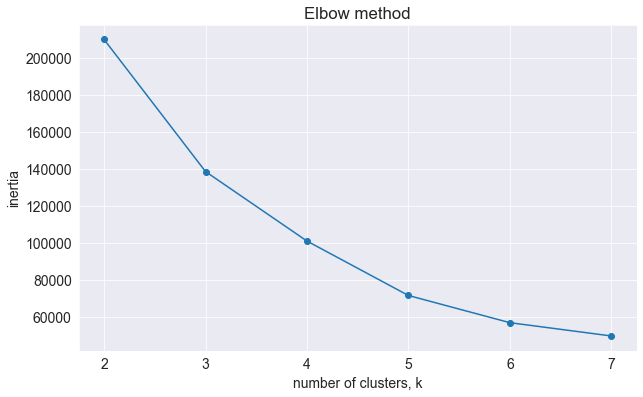

In [17]:
# Create an elbow plot to determine the optimal number of clusters
ks = range(2,8)
inertias = []

for k in ks:
    km = KMeans(n_clusters=k)
    km.fit(X)
    
    inertias.append(km.inertia_)
    
# plot the range and inertia
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.title('Elbow method')
plt.xticks(ks)
plt.show();

> Select the value 5 for K based on the elbow method plot

In [18]:
# fit KMeans with 5 clusters
km = KMeans(n_clusters=5, random_state=1)
km.fit(X)

KMeans(n_clusters=5, random_state=1)

In [19]:
# Assign the labels to the cluster feature
X.loc[:,'cluster'] = pd.Series(km.labels_)
X.head()

C:\Users\sanka\anaconda3\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\sanka\anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,AgeByDecade,Annual Income (k$),Spending Score (1-100),cluster
0,20,15,39,1
1,20,15,81,0
2,20,16,6,1
3,20,16,77,0
4,30,17,40,1


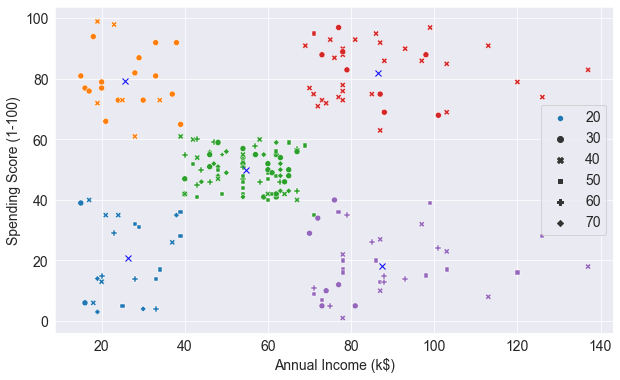

In [20]:
# Plot the data groups and the cluster centroids
unique_labels = X['cluster'].unique()

plt.figure()
for cluster_id in unique_labels:
    x_cluster = X.loc[X['cluster'] == cluster_id]
#     plt.scatter(x=x_cluster.iloc[:,1] ,y=x_cluster.iloc[:,2], cmap='viridis')
#    sns.scatterplot(x=x_cluster.iloc[:,1],y=x_cluster.iloc[:,2], hue=x_cluster.iloc[:,0], palette='cool')
#    sns.scatterplot(x=x_cluster.iloc[:,1],y=x_cluster.iloc[:,2], hue=x_cluster.iloc[:,0], size=x_cluster.iloc[:,0])
    sns.scatterplot(x=x_cluster.iloc[:,1],y=x_cluster.iloc[:,2], style=x_cluster.iloc[:,0])#, size=x_cluster.iloc[:,0])
    plt.legend([20,30,40,50,60,70])
centers_x, centers_y = km.cluster_centers_[:,1], km.cluster_centers_[:,2]
plt.plot(centers_x, centers_y, 'xb')
plt.show();

Observations:
> There are five distinct clusters:
> 1. low income and low spending score (lower left)
> 2. low income and high spending score (upper left)
> 3. low/medium income and medium spending score (center middle)
> 4. high income and low spending score (lower right)
> 5. high income and high spending score (upper right)

> People whose age below 40 are spending more. 

> Mall should target the people below 40 according to their income (ie. high income and high spending score and low income and high spending score)

> Mall should try different promotions to attract these two groups: low income and low spending score / high income and low spending score.

In [21]:
y = np.array([[39, 65, 30]])
km.predict(y)

array([2])